 <h1 style="color:red;">Student-only review website KOPAS crawler</h1>

### I am crawling Korea univ's student-ONLY lecture review website 'klue.kr' and will collect the data of  'Review and corresponding 5 area's score'

##### This data will later be used for my team project
* 2). Data Preprocessing 
* 3). fastText Word Embedding (using N-gram)
* 4). Neural Net Training
* 5). Finally It will be a model to predict scores in 5 indicators from random lecture review texts

## Step1. Import all required modules.
  <h3 style="color:blue;">!!PRESET!!: Download chrome extension 'alert control' in your chromedriver that your selenium uses, if it's other driver download the likes. Go to 'setting' and change the setting to 'block all alerts'.</h3>

In [10]:
# Import modules to use
from selenium import webdriver
import bs4
driver = webdriver.Chrome('/Users/sucky/Desktop/chromedriver') # CUSTOM SETTING
import selenium.webdriver as webdriver
import selenium.webdriver.support.ui as ui
from selenium.webdriver.common.keys import Keys
from time import sleep
# Download 'alert control' in Chrome browser and change setting to block all alerts.

In [11]:
#  Log-in to the site for authentification to use the info. inside.
klue_url = "http://klue.kr/"
driver.get(klue_url)
driver.find_element_by_xpath("/html/body/app-root/menubar/div/ul/menubar-guest/span[2]").click()
i_d = driver.find_element_by_xpath("/html/body/app-root/app-modal/div/div/div/modal-contents/div/modal-login/input[1]")
i_d.send_keys("7616tjrgml")
password = driver.find_element_by_xpath("/html/body/app-root/app-modal/div/div/div/modal-contents/div/modal-login/input[2]")
password.send_keys("dnsdud06!")
driver.find_element_by_xpath('/html/body/app-root/app-modal/div/div/div/modal-contents/div/modal-login/button').click()

## STEP2. assign 5000 urls per a batch. 
- To error-check in the middle of batches

In [14]:
#  Make batches for preventing overheating of my Macbook.

#  Make batches with range function
batches = [range(40000,40005), range(40005,40011), range(82491,82495)] # set your own. this is only for testing

## STEP3. Iterate, Crawl, and directly write the collected infos to csv file.

In [15]:
# Open CSV, CSV WRITER
import csv
f = open('kopas_score_review_dataset_{}.csv'.format(0), 'w', encoding='utf-8', newline='')
wr = csv.writer(f)

# Iterate on websites of each lecture number in klue.kr
for i in batches[1]:
        lec_url = 'http://klue.kr/lecture/{}'.format(i)
        driver.get(lec_url)
        driver.implicitly_wait(4)
        
        # record lec_num in url
        lec_num = i
        
        # get html text and parse
        html = driver.page_source # get whole html text
        soup = bs4.BeautifulSoup(html)
        review_boxes_list = soup.find_all('div', {'class':'lecture-detail-content'})
            
        # If there are none of review-score box => go on to next in loop ex).http://klue.kr/lecture/42600)
        if len(review_boxes_list) == 0 : 
            print('no contents at {}th page.'.format(lec_num))
            continue
            
        # If there are at least one or more of review - score box go on in this loop
        else :
            
            for i in review_boxes_list:

                    # Review text attained
                rev_str = i.find('div', {'class':'lecture-eval-content-context'}).text # 리뷰 텍스트 추출
    
                    # 5 Areas Scores list
                five_area_scores = [] 
                htmls_for_five_scores = (i.find_all('div', {'class':'slider-klue-outer'}))[1:6]
    
                    # Get the 5 scores values and append it to scores_for_five_areas
                for i in htmls_for_five_scores :

                    string = i.get('style')
                    lst = string.split(';')
                    the_string = lst[1]

                    if the_string.endswith('%'):  # In case the score is written like 100% 80%

                        int_score = int(the_string[-4:-1:1])//20
                        five_area_scores.append(int_score)

                    else:  # Incase it's written like 104px, 130px.

                        int_score = int(the_string[-5:-2:1])//26
                        five_area_scores.append(int_score)
                        
                # We just collected review string and 5 scores list, write it into csv file for this batch.
                wr.writerow([lec_num, five_area_scores, rev_str])


# Close CSV file.
f.close()


no contents at 40009th page.


# Done ! collected all 5types of review scores with corresponding review text.

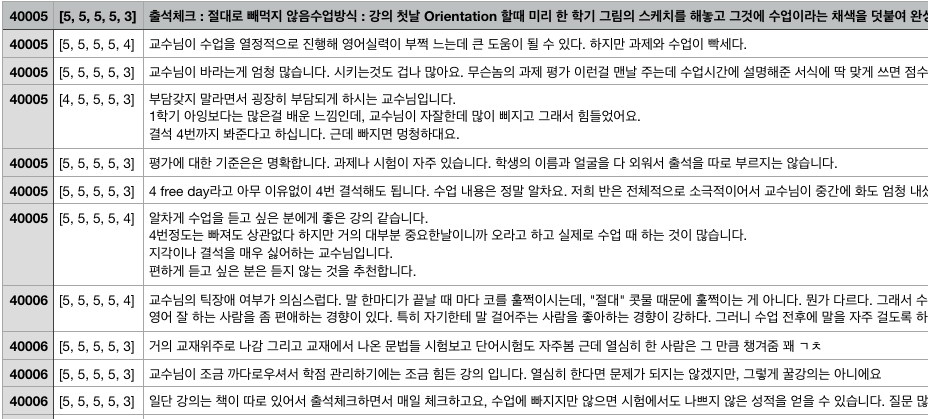